<a href="https://colab.research.google.com/github/carminesant1/face_detection/blob/main/face_detection_gui.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**FACE DETECTION**

Il progetto si concentra sullo sviluppo di un sistema di rilevamento facciale utilizzando Haar Cascade, una tecnica basata su feature Haar per identificare volti all'interno di immagini o video. Le Haar Cascade, introdotte nel campo del riconoscimento visivo da Viola e Jones nel loro lavoro fondamentale "Rapid object detection using a boosted cascade of simple features" [1], sono note per la loro efficienza computazionale. In particolare, sfruttano una cascata di classificatori addestrati su feature Haar semplici e veloci da calcolare, che consente di ottenere un sistema di rilevamento rapido anche su dispositivi con limitata capacità computazionale.
Le feature Haar presentano un vantaggio significativo rispetto alle feature Histogram of Oriented Gradients (HOG) in termini di velocità. Tuttavia, questa velocità ha un costo in termini di accuratezza, poiché le Haar Cascade tendono a soffrire di un maggiore numero di falsi positivi rispetto alle feature HOG o a modelli più avanzati basati su deep learning. Le feature HOG, sebbene più precise nella discriminazione di oggetti (come evidenziato da Khemmar et al. nel loro lavoro sulla rilevazione di pedoni [2]), richiedono una potenza computazionale superiore, rendendole meno indicate per dispositivi con risorse limitate, come in questa situazione, dove ho potuto contare su una CPU i5 e 8GB di RAM.

---

[1] Viola, P., & Jones, M. (2001, December). Rapid object detection using a boosted cascade of simple features. In Proceedings of the 2001 IEEE computer society conference on computer vision and pattern recognition. CVPR 2001 (Vol. 1, pp. I-I). Ieee.

[2] Khemmar, R., Delong, L., Decoux, B., & Ertaud, J. Y. (2019, November). Real time pedestrian detection-based faster hog/dpm and deep learning approach. In SITIS-International Conference on Signal Image Technology & Internet Based Systems.

# Modello


Nel corso del progetto, per facilitare l’addestramento delle Haar Cascade, è stata utilizzata l’interfaccia grafica Cascade Trainer GUI, sviluppata da Amin Ahmadi: https://amin-ahmadi.com/cascade-trainer-gui/. Questa GUI ha permesso una gestione intuitiva e flessibile dei parametri di addestramento, semplificando l’ottimizzazione del classificatore personalizzato.

Di seguito è riportata un’immagine con i parametri selezionati per il training.

In [ ]:
!git clone https://github.com/carminesant1/face_recognition.git

Cloning into 'face_recognition'...
remote: Enumerating objects: 37, done.
remote: Counting objects: 100% (37/37), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 37 (delta 7), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (37/37), 17.37 MiB | 15.19 MiB/s, done.
Resolving deltas: 100% (7/7), done.


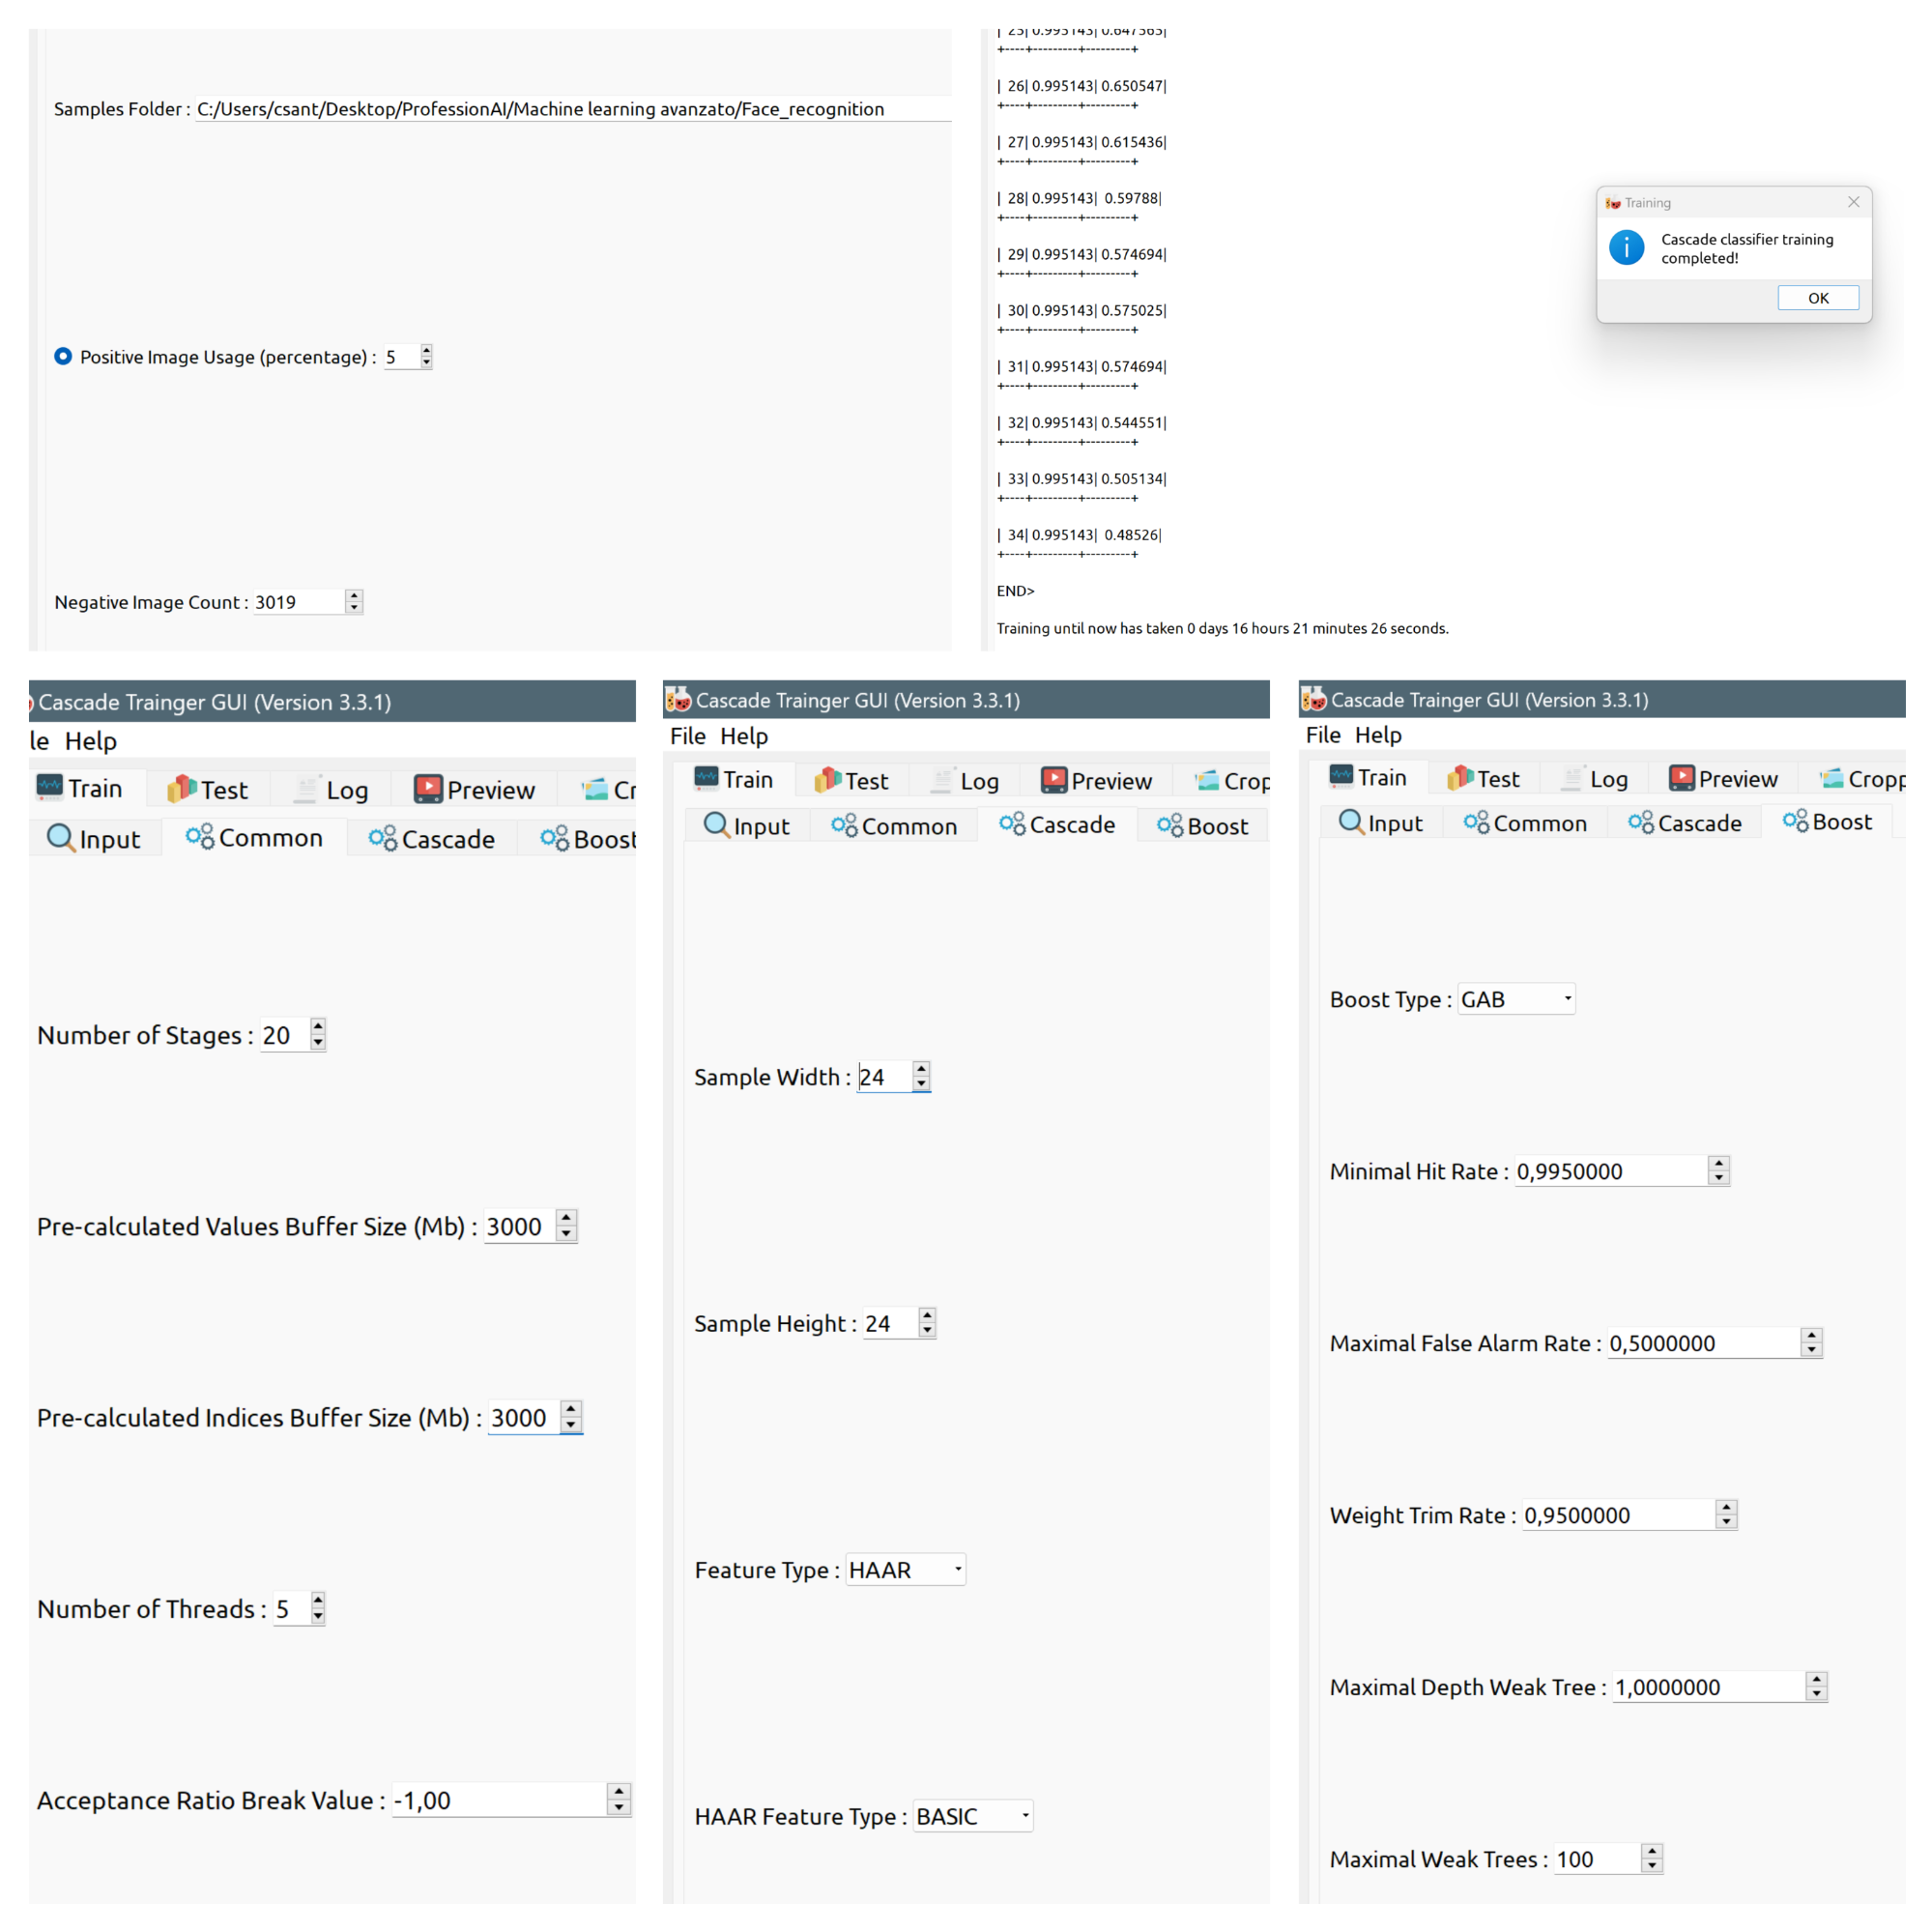

In [ ]:
import cv2
import os
from google.colab.patches import cv2_imshow
training_cascade_gui = cv2.imread('/content/face_recognition/training_cascade_gui.png')
cv2_imshow(training_cascade_gui)

# Caricamento del modello ed esempio

In [ ]:
# Path al file XML del modello Haar Cascade nella repository
cascade_path = '/content/face_recognition/cascade_gui.xml'

# Carico il modello Haar Cascade
haar_cascade = cv2.CascadeClassifier(cascade_path)

Immagine con volto: 


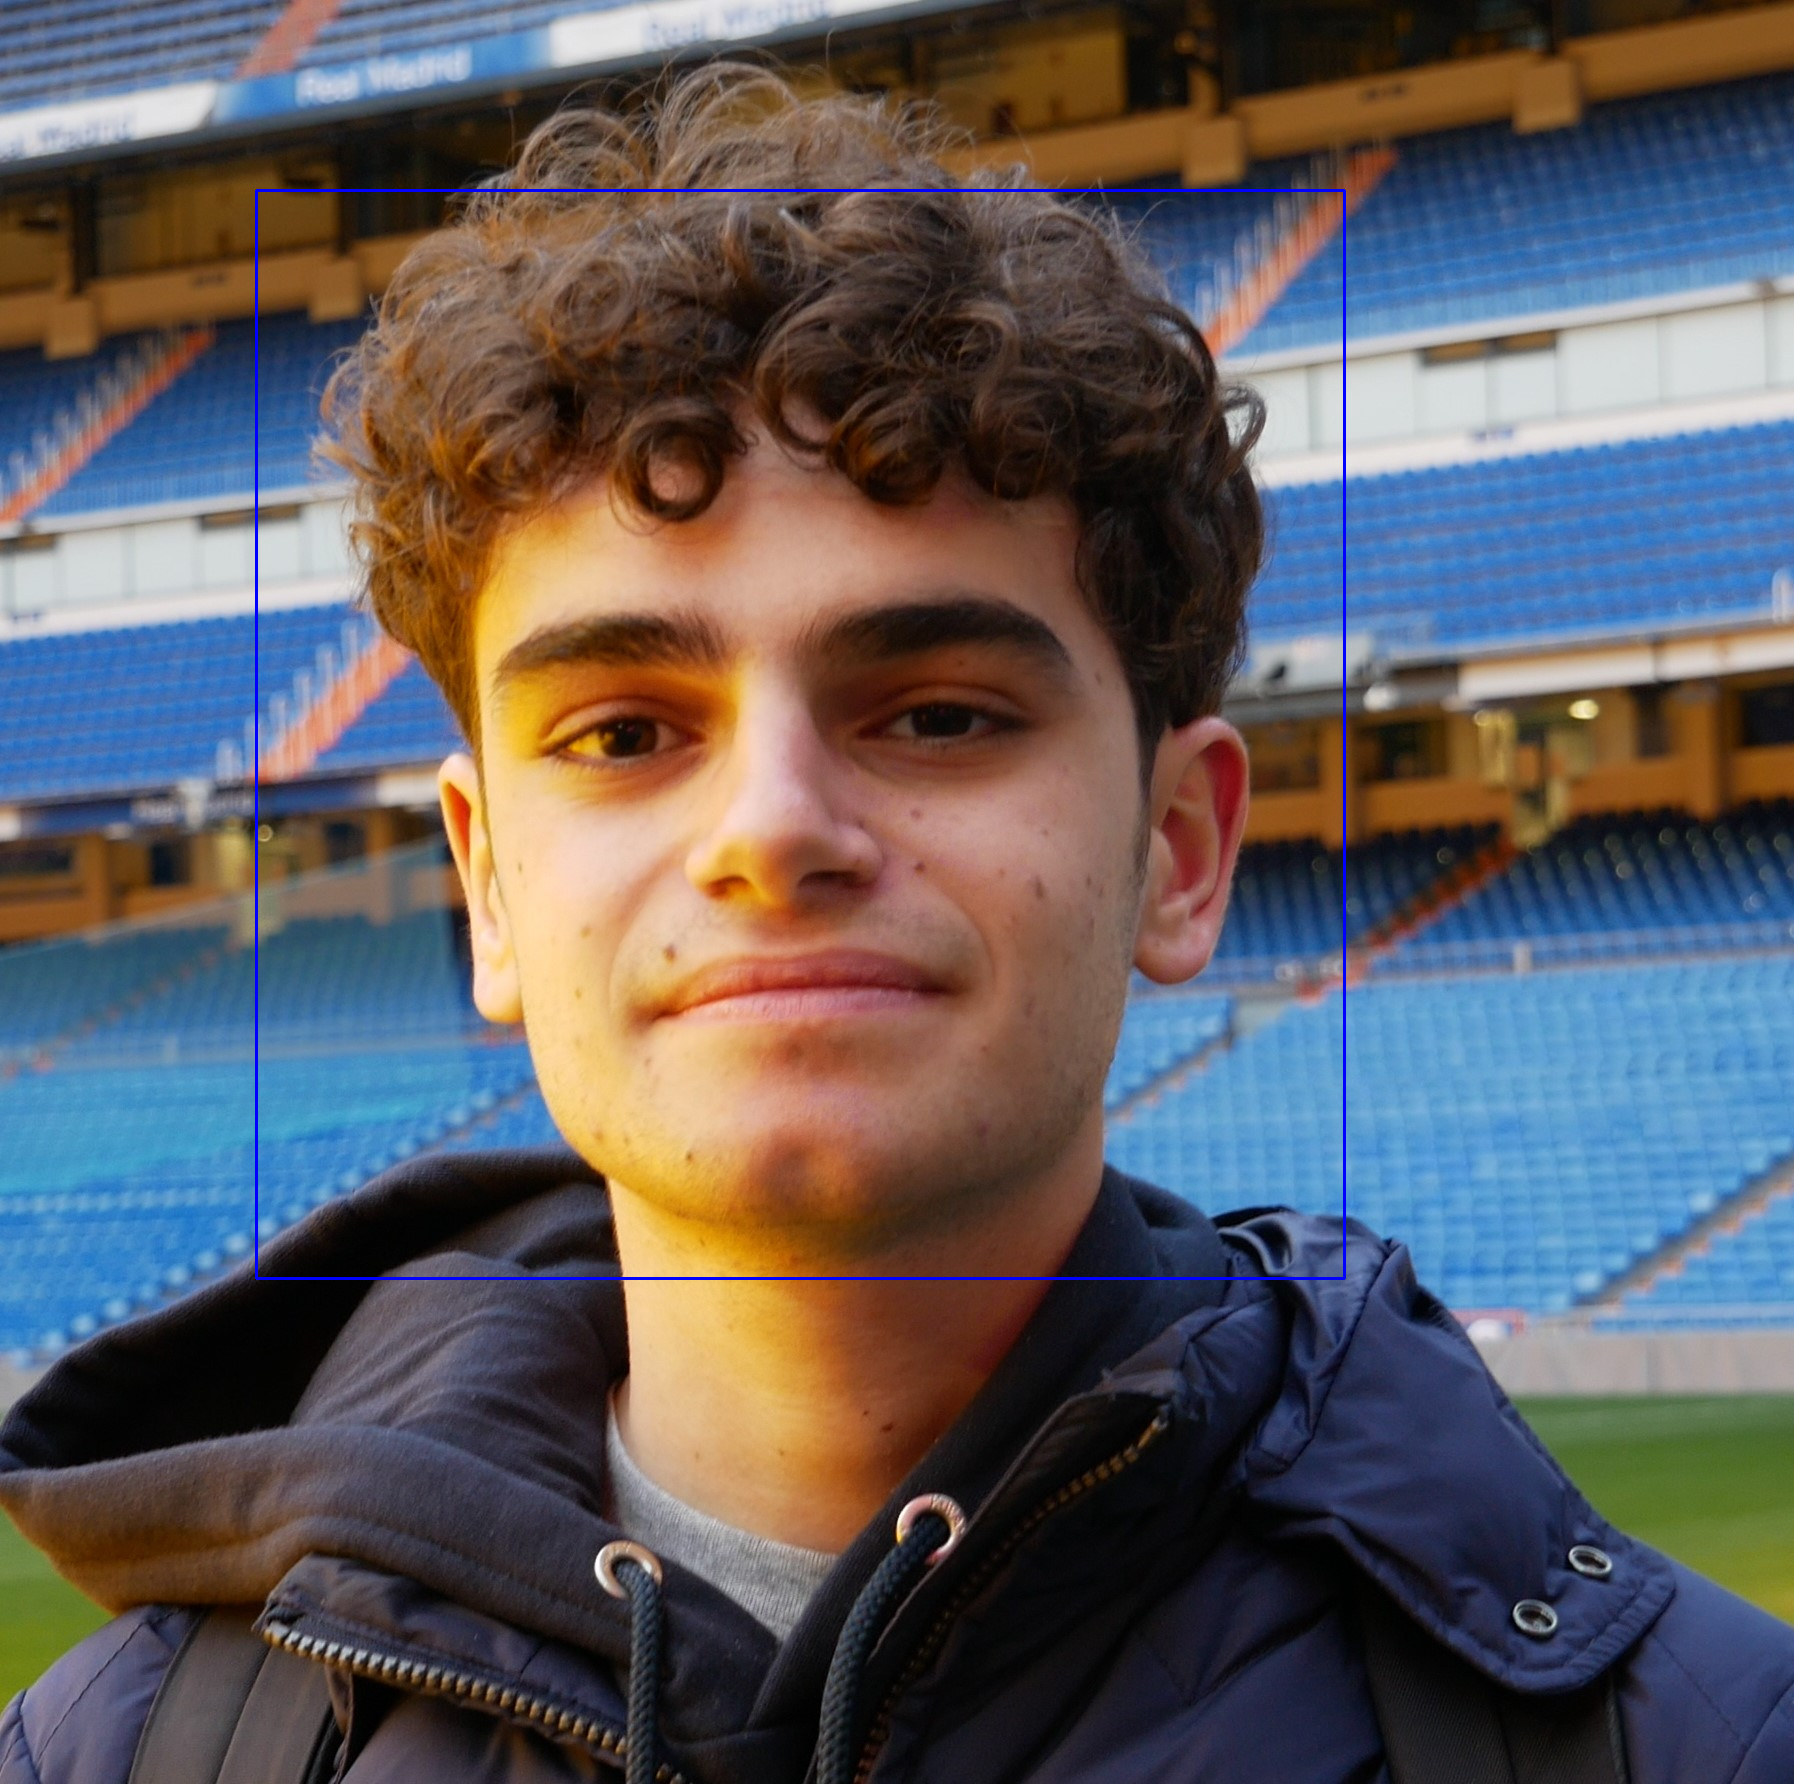

Immagine senza volto: 


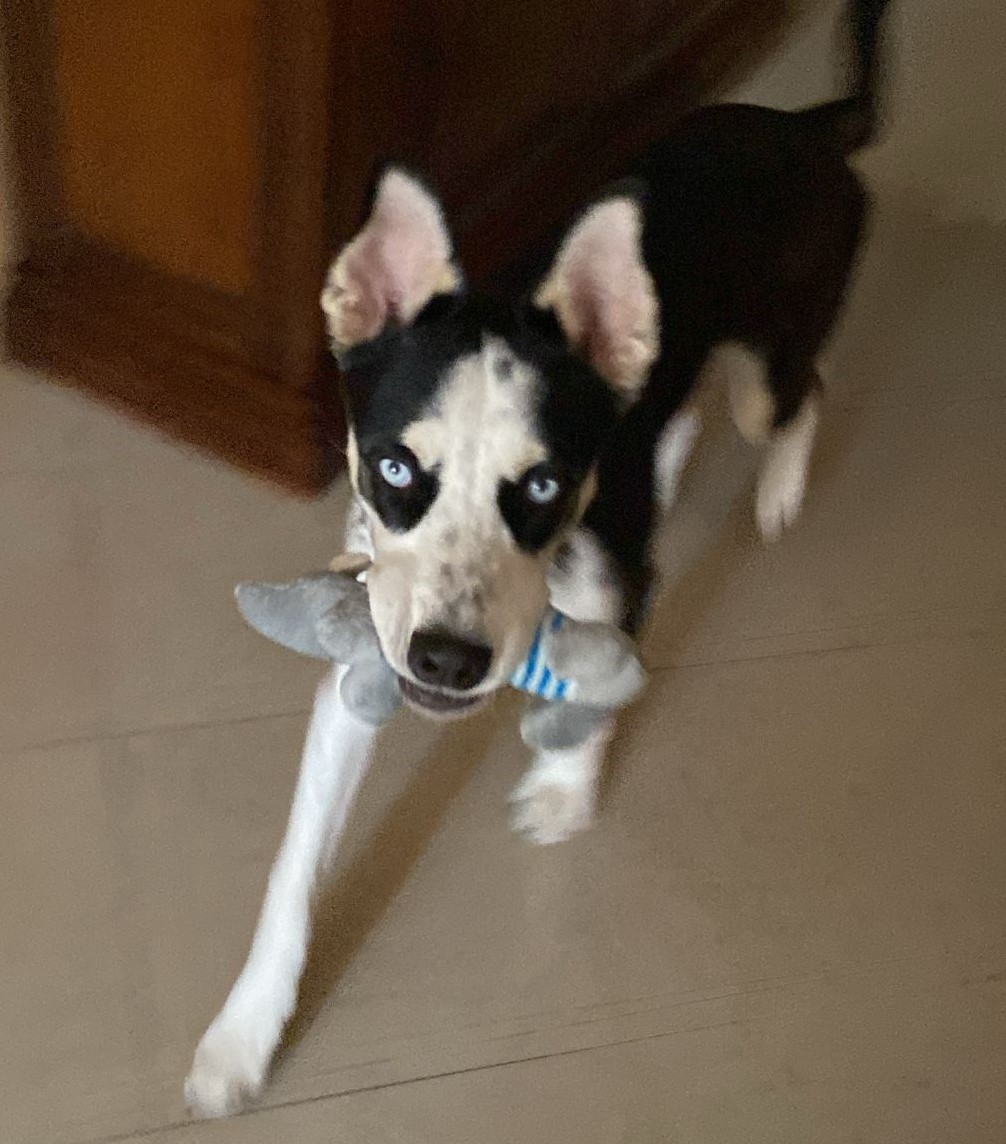

In [ ]:
# Carico un'immagine positiva e una negativa per testare il modello
pos_image = cv2.imread('/content/face_recognition/Madrid.jpg')
neg_image = cv2.imread('/content/face_recognition/Hati.jpg')

# Converto le immagini in scala di grigi
pos_gray = cv2.cvtColor(pos_image, cv2.COLOR_BGR2GRAY)
neg_gray = cv2.cvtColor(neg_image, cv2.COLOR_BGR2GRAY)

# Uso il modello Haar Cascade per rilevare oggetti
pos_objects = haar_cascade.detectMultiScale(pos_gray, scaleFactor=1.1, minNeighbors=3, minSize=(30, 30))
neg_objects = haar_cascade.detectMultiScale(neg_gray, scaleFactor=1.1, minNeighbors=3, minSize=(30, 30))

# Disegno i rettangoli attorno agli oggetti rilevati
for (x, y, w, h) in pos_objects:
    cv2.rectangle(pos_image, (x, y), (x+w, y+h), (255, 0, 0), 2)

for (x, y, w, h) in neg_objects:
    cv2.rectangle(neg_image, (x, y), (x+w, y+h), (255, 0, 0), 2)

# Visualizzo i risultati
print("Immagine con volto: ")
cv2_imshow(pos_image)
print("Immagine senza volto: ")
cv2_imshow(neg_image)


# Programma

In [ ]:
from sklearn.pipeline import Pipeline

#url immagine
url_img = input("Inserisci l'URL o il percorso dell'immagine: ")

# Pipeline
pipeline_steps = [
    ("read_image", lambda x: cv2.imread(x)),  # Carica l'immagine
    ("convert_to_gray", lambda img: cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)),  # Converte in scala di grigi
    ("detect_faces", lambda gray_img: haar_cascade.detectMultiScale(
        gray_img, scaleFactor=1.1, minNeighbors=3, minSize=(30, 30)
    ))
]

# Esecuzione manuale della pipeline
try:
    data = url_img
    for step_name, step_func in pipeline_steps:
        data = step_func(data)

    # Risultato finale: coordinate dei volti
    print(f'Rilevati {len(data)} volti:')
    print(data)
except Exception as e:
    print(f"Errore: {e}")


Inserisci l'URL o il percorso dell'immagine: /content/face_recognition/Hati.jpg
Rilevati 0 volti:
()
